Coursera Captstone Project

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.10
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.7.12               |           py37_0         3.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following packages will be UPDATED:

  conda                      pkgs/main::conda-4.7.10-py37_0 --> conda-forge::conda-4.7.12-py37_0



conda-4.7.12         | 3.0 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: | 
The environm

In [30]:
#Using Bandra,Mumbai as the location and finding out its coordinates
address = 'Bandra, Mumbai, India'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

19.0549792 72.8402203


In [31]:
#Searching an area within 10kms
search_query = 'Shopping'
radius = 10000
print(search_query + ' .... OK!')

Shopping .... OK!


In [32]:
#Foursqaure API credentitals
CLIENT_ID = 'WSGPSOPIBK50UKK0N0AP5QOZBQSN2J5WUBW3DYMENGCI0M45' # your Foursquare ID
CLIENT_SECRET = 'T10G0RCOH53RYG3WROR4CYJII3ASBYTOENMC4MQGA0NUR1M5' # your Foursquare Secret
VERSION = '20190801'
LIMIT = 30

In [33]:
#Address and search using Foursqaure API URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=WSGPSOPIBK50UKK0N0AP5QOZBQSN2J5WUBW3DYMENGCI0M45&client_secret=T10G0RCOH53RYG3WROR4CYJII3ASBYTOENMC4MQGA0NUR1M5&ll=19.0549792,72.8402203&v=20190801&query=Shopping&radius=10000&limit=30'

In [34]:
#Storing the requests in variable results
results = requests.get(url).json()

In [35]:
#Assigning the relevant part of JSON to venues
venues = results['response']['venues']
df = json_normalize(venues)
df

categories  hasPerk  \
0   [{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...    False   
1   [{'id': '4bf58dd8d48988d1ff941735', 'name': 'M...    False   
2   [{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...    False   
3   [{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...    False   
4   [{'id': '4bf58dd8d48988d108951735', 'name': 'W...    False   
5   [{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...    False   
6   [{'id': '4bf58dd8d48988d1f6941735', 'name': 'D...    False   
7   [{'id': '4bf58dd8d48988d124951735', 'name': 'A...    False   
8   [{'id': '4bf58dd8d48988d1f8941735', 'name': 'F...    False   
9   [{'id': '4bf58dd8d48988d1ff941735', 'name': 'M...    False   
10  [{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...    False   
11  [{'id': '4bf58dd8d48988d124941735', 'name': 'O...    False   
12  [{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...    False   
13  [{'id': '4bf58dd8d48988d1f6941735', 'name': 'D...    False   
14  [{'id': '4bf58dd8d48988d1f7941735', 'name': 'F...    False   
15                                                 []    False   
16  [{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...    False   
17  [{'id': '52f2ab2ebcbc57f1066b8b35', 'name': 'O...    False   
18  [{'id': '4bf58dd8d48988d103951735', 'name': 'C...    False   
19  [{'id': '4bf58dd8d48988d130941735', 'name': 'B...    False   
20  [{'id': '4bf58dd8d48988d124941735', 'name': 'O...    False   
21  [{'id': '4bf58dd8d48988d115951735', 'name': 'B...    False   
22  [{'id': '4bf58dd8d48988d1f6941735', 'name': 'D...    False   
23  [{'id': '4bf58dd8d48988d122951735', 'name': 'E...    False   
24  [{'id': '4bf58dd8d48988d124941735', 'name': 'O...    False   
25                                                 []    False   
26  [{'id': '4d954b0ea243a5684a65b473', 'name': 'C...    False   
27  [{'id': '4bf58dd8d48988d1ff941735', 'name': 'M...    False   
28  [{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...    False   
29  [{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...    False   

                          id               location.address location.cc  \
0   4fb3af8a0cd69d77c75bcd68               Hill Rd., Bandra          IN   
1   4e4bacab45dd5144016e8ed7                            NaN          IN   
2   509b9fcbe4b080289fbfd697                   Linking Road          IN   
3   4f97edb8e4b0cb04ce2e5ca3                            NaN          IN   
4   4fdc6876e4b0ede381e80a56                            NaN          IN   
5   5311cc93498e3644b92c9e59            Near Jal Vayu Vihar          IN   
6   4dcaa84f1f6e2812677bff8d            Devashish, Dandpada          IN   
7   53623517498ef7a392fb7964                            NaN          IN   
8   51d7e643498efc2f2f1991da                            NaN          IN   
9   4fc84bcae4b04ec64ad8e23e                            NaN          IN   
10  5d5d3112ef5f070008d102fb          Monghibai Rd, Navpada          IN   
11  4f262f7ce4b0eec7ffed2ae5                            NaN          IN   
12  530c4c7f11d25e021166b7b1                            NaN          IN   
13  502fa5dbe4b083621592c9a4                  Sahakar Nagar          IN   
14  4e893bd7722ef30155dc0c0b                            NaN          IN   
15  53f468a3498e0c9b4a1996f6        401, Sun Vision Classic          IN   
16  4fdd79fae4b0f11e3585ce32           High Street Phoenix,          IN   
17  539dc199498e08a9ddc73088                            NaN          IN   
18  4f97db95e4b0793c8e2694dd                 Ghatkopar west          IN   
19  4f23dfb6e4b0085e4957c3b3              Opp Punjab Grill,          IN   
20  531427be11d2b14c7d588e52                    Lower Parel          IN   
21  4f5df8eae4b01014bc1c009f                            NaN          IN   
22  4fc8e50ce4b0c735a3723c3b                            NaN          IN   
23  4d451b917e2e548145b8678f   opp Navrang cinema, J P road          IN   
24  4f895de5e4b04a075e85f1ad                            NaN          IN   
25  4e33e1ef7d8b6946c1f33011                  

In [36]:
#Keeping only columns that include venue name and other fields related to the location
filtered_columns = ['name', 'categories'] + [col for col in df.columns if col.startswith('location.')] + ['id']
df2 = df.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df2['categories'] = df2.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df2.columns = [column.split('.')[-1] for column in df2.columns]

df2

name              categories  \
0                         Elco Arcade Shopping Centre           Shopping Mall   
1                                 Saga shopping Centr      Miscellaneous Shop   
2                            Mini Shopping Mall (MSM)           Shopping Mall   
3                               Odeon Shopping Center           Shopping Mall   
4      Some Crap Girls Oriented Cheap Shopping Street           Women's Store   
5                         Heera Panna Shopping Centre           Shopping Mall   
6                               Danda Shopping Centre        Department Store   
7                             central shopping market         Automotive Shop   
8                 Star Bazaar Home Furniture Shopping  Furniture / Home Store   
9                            modaiolo shopping bazaar      Miscellaneous Shop   
10                             Ramdar Shopping Centre           Shopping Mall   
11                              sayba shopping center                  Office   
12   Shreenath Shopping Centre Premises Co-op Society           Shopping Mall   
13                      Sahakar Nagar shopping market        Department Store   
14                              Arasa Shopping Center             Flea Market   
15  Price Comparison Site in India for Online Shop...                    None   
16                                          Palladium           Shopping Mall   
17  Shop 33, Kamdhune Shopping Center, Lokhandwala...            Outlet Store   
18                              milan shopping centre          Clothing Store   
19                       Juhu Supreme Shopping Centre                Building   
20                 Infinite Online Shopping Pvt. Ltd.                  Office   
21                           Lokmanya Shopping Arcade               Bike Shop   
22                          satikrupa Shopping Centre        Department Store   
23                              Sunil Shopping Center       Electronics Store   
24                                      Mona Shopping                  Office   
25  Rajeshwari bldg m g road opp satyam shopping c...                    None   
26                             Nahar Shopping Complex       Convenience Store   
27                              Jewel Shopping Centre      Miscellaneous Shop   
28                           Mufaddal Shopping Arcade           Shopping Mall   
29                        Heera Panna Shopping Center           Shopping Mall   

                          address  cc    city country  \
0                Hill Rd., Bandra  IN  Mumbai   India   
1                             NaN  IN  Mumbai   India   
2                    Linking Road  IN     NaN   India   
3                             NaN  IN     NaN   India   
4                             NaN  IN     NaN   India   
5             Near Jal Vayu Vihar  IN  Mumbai   India   
6             Devashish, Dandpada  IN  Mumbai   India   
7                             NaN  IN     NaN   India   
8                             NaN  IN     NaN   India   
9                             NaN  IN     NaN   India   
10          Monghibai Rd, Navpada  IN  Mumbai   India   
11                            NaN  IN     NaN   India   
12                            NaN  IN     NaN   India   
13                  Sahakar Nagar  IN  Mumbai   India   
14                            NaN  IN     NaN   India   
15        401, Sun Vision Classic  IN  Mumbai   India   
16           High Street Phoenix,  IN  Mumbai   India   
17                            NaN  IN     NaN   India   
18                 Ghatkopar west  IN     NaN   India   
19              Opp Punjab Grill,  IN     NaN   India   
20                    Lower Parel  IN  Mumbai   India   
21                            NaN  IN     NaN   India   
22                            NaN  IN     NaN   India   
23   opp Navrang cinema, J P road  IN  Mumbai   India   
24                            NaN  IN  Mumbai   India   
25                            NaN  IN     NaN   India  

In [37]:
#extracting venue id from dataset
venue_id_list=df2['id']

In [38]:
#Extracting the number of likes for each venue

url_list = []
like_list = []
json_list = []

for i in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)

[17, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 266, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 60]


In [39]:
like_list2=pd.DataFrame(like_list)
like_list2.rename(columns = {0:'Like'}, inplace=True)
like_list2

Like
0     17
1      0
2      0
3      1
4      0
5      0
6      0
7      1
8      1
9      0
10     1
11     0
12     1
13     1
14     0
15     2
16   266
17     0
18     4
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29    60

In [40]:
#Adding the 'Like' column to main dataset
df3 = pd.concat([df2, like_list2], axis = 1)
df3

name              categories  \
0                         Elco Arcade Shopping Centre           Shopping Mall   
1                                 Saga shopping Centr      Miscellaneous Shop   
2                            Mini Shopping Mall (MSM)           Shopping Mall   
3                               Odeon Shopping Center           Shopping Mall   
4      Some Crap Girls Oriented Cheap Shopping Street           Women's Store   
5                         Heera Panna Shopping Centre           Shopping Mall   
6                               Danda Shopping Centre        Department Store   
7                             central shopping market         Automotive Shop   
8                 Star Bazaar Home Furniture Shopping  Furniture / Home Store   
9                            modaiolo shopping bazaar      Miscellaneous Shop   
10                             Ramdar Shopping Centre           Shopping Mall   
11                              sayba shopping center                  Office   
12   Shreenath Shopping Centre Premises Co-op Society           Shopping Mall   
13                      Sahakar Nagar shopping market        Department Store   
14                              Arasa Shopping Center             Flea Market   
15  Price Comparison Site in India for Online Shop...                    None   
16                                          Palladium           Shopping Mall   
17  Shop 33, Kamdhune Shopping Center, Lokhandwala...            Outlet Store   
18                              milan shopping centre          Clothing Store   
19                       Juhu Supreme Shopping Centre                Building   
20                 Infinite Online Shopping Pvt. Ltd.                  Office   
21                           Lokmanya Shopping Arcade               Bike Shop   
22                          satikrupa Shopping Centre        Department Store   
23                              Sunil Shopping Center       Electronics Store   
24                                      Mona Shopping                  Office   
25  Rajeshwari bldg m g road opp satyam shopping c...                    None   
26                             Nahar Shopping Complex       Convenience Store   
27                              Jewel Shopping Centre      Miscellaneous Shop   
28                           Mufaddal Shopping Arcade           Shopping Mall   
29                        Heera Panna Shopping Center           Shopping Mall   

                          address  cc    city country  \
0                Hill Rd., Bandra  IN  Mumbai   India   
1                             NaN  IN  Mumbai   India   
2                    Linking Road  IN     NaN   India   
3                             NaN  IN     NaN   India   
4                             NaN  IN     NaN   India   
5             Near Jal Vayu Vihar  IN  Mumbai   India   
6             Devashish, Dandpada  IN  Mumbai   India   
7                             NaN  IN     NaN   India   
8                             NaN  IN     NaN   India   
9                             NaN  IN     NaN   India   
10          Monghibai Rd, Navpada  IN  Mumbai   India   
11                            NaN  IN     NaN   India   
12                            NaN  IN     NaN   India   
13                  Sahakar Nagar  IN  Mumbai   India   
14                            NaN  IN     NaN   India   
15        401, Sun Vision Classic  IN  Mumbai   India   
16           High Street Phoenix,  IN  Mumbai   India   
17                            NaN  IN     NaN   India   
18                 Ghatkopar west  IN     NaN   India   
19              Opp Punjab Grill,  IN     NaN   India   
20                    Lower Parel  IN  Mumbai   India   
21                            NaN  IN     NaN   India   
22                            NaN  IN     NaN   India   
23   opp Navrang cinema, J P road  IN  Mumbai   India   
24                            NaN  IN  Mumbai   India   
25                            NaN  IN     NaN   India  

In [41]:
#Sorting the table based on number of Likes in descending order
df4=df3.sort_values(by='Like', ascending=False)
df4

name              categories  \
16                                          Palladium           Shopping Mall   
29                        Heera Panna Shopping Center           Shopping Mall   
0                         Elco Arcade Shopping Centre           Shopping Mall   
18                              milan shopping centre          Clothing Store   
15  Price Comparison Site in India for Online Shop...                    None   
10                             Ramdar Shopping Centre           Shopping Mall   
13                      Sahakar Nagar shopping market        Department Store   
12   Shreenath Shopping Centre Premises Co-op Society           Shopping Mall   
3                               Odeon Shopping Center           Shopping Mall   
7                             central shopping market         Automotive Shop   
8                 Star Bazaar Home Furniture Shopping  Furniture / Home Store   
9                            modaiolo shopping bazaar      Miscellaneous Shop   
21                           Lokmanya Shopping Arcade               Bike Shop   
28                           Mufaddal Shopping Arcade           Shopping Mall   
27                              Jewel Shopping Centre      Miscellaneous Shop   
26                             Nahar Shopping Complex       Convenience Store   
25  Rajeshwari bldg m g road opp satyam shopping c...                    None   
24                                      Mona Shopping                  Office   
23                              Sunil Shopping Center       Electronics Store   
22                          satikrupa Shopping Centre        Department Store   
19                       Juhu Supreme Shopping Centre                Building   
20                 Infinite Online Shopping Pvt. Ltd.                  Office   
5                         Heera Panna Shopping Centre           Shopping Mall   
17  Shop 33, Kamdhune Shopping Center, Lokhandwala...            Outlet Store   
4      Some Crap Girls Oriented Cheap Shopping Street           Women's Store   
1                                 Saga shopping Centr      Miscellaneous Shop   
14                              Arasa Shopping Center             Flea Market   
6                               Danda Shopping Centre        Department Store   
11                              sayba shopping center                  Office   
2                            Mini Shopping Mall (MSM)           Shopping Mall   

                          address  cc    city country  \
16           High Street Phoenix,  IN  Mumbai   India   
29           Bhulabhai Desai Road  IN  Mumbai   India   
0                Hill Rd., Bandra  IN  Mumbai   India   
18                 Ghatkopar west  IN     NaN   India   
15        401, Sun Vision Classic  IN  Mumbai   India   
10          Monghibai Rd, Navpada  IN  Mumbai   India   
13                  Sahakar Nagar  IN  Mumbai   India   
12                            NaN  IN     NaN   India   
3                             NaN  IN     NaN   India   
7                             NaN  IN     NaN   India   
8                             NaN  IN     NaN   India   
9                             NaN  IN     NaN   India   
21                            NaN  IN     NaN   India   
28                            NaN  IN     NaN   India   
27                            NaN  IN     NaN   India   
26  Nahar Amrit Shakti, Nahar Rd.  IN  Mumbai   India   
25                            NaN  IN     NaN   India   
24                            NaN  IN  Mumbai   India   
23   opp Navrang cinema, J P road  IN  Mumbai   India   
22                            NaN  IN     NaN   India   
19              Opp Punjab Grill,  IN     NaN   India   
20                    Lower Parel  IN  Mumbai   India   
5             Near Jal Vayu Vihar  IN  Mumbai   India   
17                            NaN  IN     NaN   India   
4                             NaN  IN     NaN   India   
1                             NaN  IN  Mumbai   India  

In [42]:
df4['id']

16    4fdd79fae4b0f11e3585ce32
29    4b0587def964a520d1a422e3
0     4fb3af8a0cd69d77c75bcd68
18    4f97db95e4b0793c8e2694dd
15    53f468a3498e0c9b4a1996f6
10    5d5d3112ef5f070008d102fb
13    502fa5dbe4b083621592c9a4
12    530c4c7f11d25e021166b7b1
3     4f97edb8e4b0cb04ce2e5ca3
7     53623517498ef7a392fb7964
8     51d7e643498efc2f2f1991da
9     4fc84bcae4b04ec64ad8e23e
21    4f5df8eae4b01014bc1c009f
28    53084b27498e90f73be96964
27    51021feae4b054009a81ded4
26    4c1a3475d4d9c9282212f229
25    4e33e1ef7d8b6946c1f33011
24    4f895de5e4b04a075e85f1ad
23    4d451b917e2e548145b8678f
22    4fc8e50ce4b0c735a3723c3b
19    4f23dfb6e4b0085e4957c3b3
20    531427be11d2b14c7d588e52
5     5311cc93498e3644b92c9e59
17    539dc199498e08a9ddc73088
4     4fdc6876e4b0ede381e80a56
1     4e4bacab45dd5144016e8ed7
14    4e893bd7722ef30155dc0c0b
6     4dcaa84f1f6e2812677bff8d
11    4f262f7ce4b0eec7ffed2ae5
2     509b9fcbe4b080289fbfd697
Name: id, dtype: object

In [43]:
#Separating name, distance and Like columns from main dataframe
df5 = df4[['name','distance','Like']]
df5

name  distance  Like
16                                          Palladium      6955   266
29                        Heera Panna Shopping Center      9181    60
0                         Elco Arcade Shopping Centre       747    17
18                              milan shopping centre      7663     4
15  Price Comparison Site in India for Online Shop...      5446     2
10                             Ramdar Shopping Centre      4992     1
13                      Sahakar Nagar shopping market      4679     1
12   Shreenath Shopping Centre Premises Co-op Society      5087     1
3                               Odeon Shopping Center      7783     1
7                             central shopping market      2734     1
8                 Star Bazaar Home Furniture Shopping      8642     1
9                            modaiolo shopping bazaar      3627     0
21                           Lokmanya Shopping Arcade      6826     0
28                           Mufaddal Shopping Arcade     10280     0
27                              Jewel Shopping Centre      8536     0
26                             Nahar Shopping Complex      8367     0
25  Rajeshwari bldg m g road opp satyam shopping c...      7136     0
24                                      Mona Shopping      7722     0
23                              Sunil Shopping Center      7707     0
22                          satikrupa Shopping Centre      7870     0
19                       Juhu Supreme Shopping Centre      6713     0
20                 Infinite Online Shopping Pvt. Ltd.      6398     0
5                         Heera Panna Shopping Centre      9798     0
17  Shop 33, Kamdhune Shopping Center, Lokhandwala...      9827     0
4      Some Crap Girls Oriented Cheap Shopping Street      2177     0
1                                 Saga shopping Centr       277     0
14                              Arasa Shopping Center      7335     0
6                               Danda Shopping Centre      2652     0
11                              sayba shopping center      4425     0
2                            Mini Shopping Mall (MSM)      1273     0

In [44]:
#Normalizing the dataset
from sklearn.preprocessing import StandardScaler

X = df5.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
pd.DataFrame(cluster_dataset)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0         1
0   0.311826  5.244168
1   1.119102  0.993813
2  -1.939556  0.106603
3   0.568587 -0.161624
4  -0.235426 -0.202889
5  -0.400072 -0.223522
6  -0.513584 -0.223522
7  -0.365620 -0.223522
8   0.612106 -0.223522
9  -1.218954 -0.223522
10  0.923630 -0.223522
11 -0.895101 -0.244155
12  0.265043 -0.244155
13  1.517664 -0.244155
14  0.885188 -0.244155
15  0.823899 -0.244155
16  0.377467 -0.244155
17  0.589984 -0.244155
18  0.584544 -0.244155
19  0.643658 -0.244155
20  0.224062 -0.244155
21  0.109825 -0.244155
22  1.342863 -0.244155
23  1.353380 -0.244155
24 -1.420955 -0.244155
25 -2.110005 -0.244155
26  0.449636 -0.244155
27 -1.248692 -0.244155
28 -0.605699 -0.244155
29 -1.748798 -0.244155

In [45]:
#Initializing K Means clustering method
from sklearn.cluster import KMeans
num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[2 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1]


In [46]:
#Each row is assigned a label
df5["Labels"] = labels
df5.head(30)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


name  distance  Like  Labels
16                                          Palladium      6955   266       2
29                        Heera Panna Shopping Center      9181    60       0
0                         Elco Arcade Shopping Centre       747    17       1
18                              milan shopping centre      7663     4       0
15  Price Comparison Site in India for Online Shop...      5446     2       1
10                             Ramdar Shopping Centre      4992     1       1
13                      Sahakar Nagar shopping market      4679     1       1
12   Shreenath Shopping Centre Premises Co-op Society      5087     1       1
3                               Odeon Shopping Center      7783     1       0
7                             central shopping market      2734     1       1
8                 Star Bazaar Home Furniture Shopping      8642     1       0
9                            modaiolo shopping bazaar      3627     0       1
21                           Lokmanya Shopping Arcade      6826     0       0
28                           Mufaddal Shopping Arcade     10280     0       0
27                              Jewel Shopping Centre      8536     0       0
26                             Nahar Shopping Complex      8367     0       0
25  Rajeshwari bldg m g road opp satyam shopping c...      7136     0       0
24                                      Mona Shopping      7722     0       0
23                              Sunil Shopping Center      7707     0       0
22                          satikrupa Shopping Centre      7870     0       0
19                       Juhu Supreme Shopping Centre      6713     0       0
20                 Infinite Online Shopping Pvt. Ltd.      6398     0       0
5                         Heera Panna Shopping Centre      9798     0       0
17  Shop 33, Kamdhune Shopping Center, Lokhandwala...      9827     0       0
4      Some Crap Girls Oriented Cheap Shopping Street      2177     0       1
1                                 Saga shopping Centr       277     0       1
14                              Arasa Shopping Center      7335     0       0
6                               Danda Shopping Centre      2652     0       1
11                              sayba shopping center      4425     0       1
2                            Mini Shopping Mall (MSM)      1273     0       1

In [47]:
#Displaying the different bins
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
x=df5['Labels']
num_bins = 3
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=1)
plt.subplots_adjust(left=.5)
plt.xticks(range(0, 3))
plt.yticks(range(1, 16))
plt.ylabel('No of Shopping Malls')
plt.show()

<Figure size 640x480 with 1 Axes>

In [48]:
#Checking the centroid values by averaging the features of each cluster
df5.groupby('Labels').mean()

distance        Like
Labels                         
0       8104.941176    3.882353
1       3176.333333    1.916667
2       6955.000000  266.000000

In [49]:
k_means_labels = k_means.labels_
k_means_labels

array([2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1], dtype=int32)

In [50]:
k_means_cluster_centers = k_means.cluster_centers_
pd.DataFrame(k_means_cluster_centers)

0         1
0  0.728861 -0.164051
1 -1.058539 -0.204609
2  0.311826  5.244168

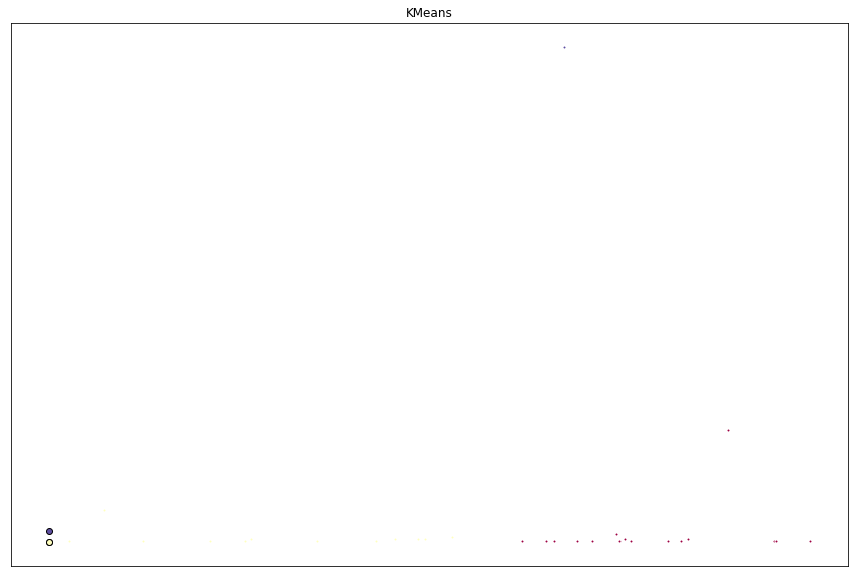

In [51]:
# Plotting library
import matplotlib.pyplot as plt 

#Backend for rendering plots within the browser
%matplotlib inline 

#Initializing the plot with specified dimensions.
fig = plt.figure(figsize=(15, 10))

#Colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

#Create a plot
ax = fig.add_subplot(1, 1, 1)

#Loop through the data and plot the datapoints and centroids.
#K will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[-1.5,1],[1,3],[3,6]])), colors):

    #Create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    #Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    #Plot the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    #Plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

#Title of the plot
ax.set_title('KMeans')

#Remove x-axis ticks
ax.set_xticks(())

#Remove y-axis ticks
ax.set_yticks(())

#Show the plot
plt.show()

In [52]:
#Name of shopping malls in cluster 0
df5.loc[df5['Labels']==0]

name  distance  Like  Labels
29                        Heera Panna Shopping Center      9181    60       0
18                              milan shopping centre      7663     4       0
3                               Odeon Shopping Center      7783     1       0
8                 Star Bazaar Home Furniture Shopping      8642     1       0
21                           Lokmanya Shopping Arcade      6826     0       0
28                           Mufaddal Shopping Arcade     10280     0       0
27                              Jewel Shopping Centre      8536     0       0
26                             Nahar Shopping Complex      8367     0       0
25  Rajeshwari bldg m g road opp satyam shopping c...      7136     0       0
24                                      Mona Shopping      7722     0       0
23                              Sunil Shopping Center      7707     0       0
22                          satikrupa Shopping Centre      7870     0       0
19                       Juhu Supreme Shopping Centre      6713     0       0
20                 Infinite Online Shopping Pvt. Ltd.      6398     0       0
5                         Heera Panna Shopping Centre      9798     0       0
17  Shop 33, Kamdhune Shopping Center, Lokhandwala...      9827     0       0
14                              Arasa Shopping Center      7335     0       0

In [53]:
#Name of shopping malls in cluster 1
df5.loc[df5['Labels']==1]

name  distance  Like  Labels
0                         Elco Arcade Shopping Centre       747    17       1
15  Price Comparison Site in India for Online Shop...      5446     2       1
10                             Ramdar Shopping Centre      4992     1       1
13                      Sahakar Nagar shopping market      4679     1       1
12   Shreenath Shopping Centre Premises Co-op Society      5087     1       1
7                             central shopping market      2734     1       1
9                            modaiolo shopping bazaar      3627     0       1
4      Some Crap Girls Oriented Cheap Shopping Street      2177     0       1
1                                 Saga shopping Centr       277     0       1
6                               Danda Shopping Centre      2652     0       1
11                              sayba shopping center      4425     0       1
2                            Mini Shopping Mall (MSM)      1273     0       1

In [54]:
#Name of shopping malls in cluster 2
df5.loc[df5['Labels']==2]

name  distance  Like  Labels
16  Palladium      6955   266       2

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


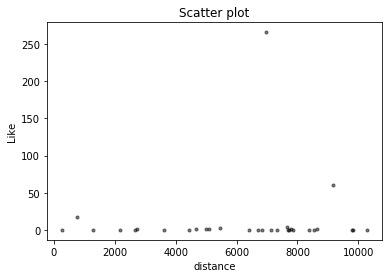

In [55]:
#Scatter plot
a = df5.distance
b = df5.Like
colors = (0,0,0)
area = np.pi*3

plt.scatter(a, b, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('distance')
plt.ylabel('Like')
plt.show()

In [56]:
#Importing librarires for various other plots
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

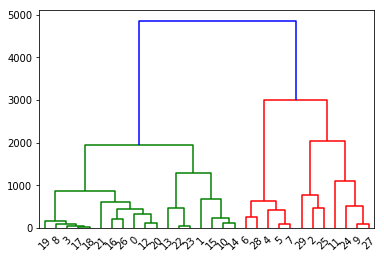

In [57]:
#Hierarchy plot
import scipy
import scipy.cluster.hierarchy as sch
import matplotlib.pylab as plt
X = df5.iloc[:, [1, 2]].values
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))

In [58]:
#Modeling agglomerative clusters
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
model.fit(X)
Agglolabels = model.labels_
Agglolabels

array([1, 1, 0, 1, 2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 0])

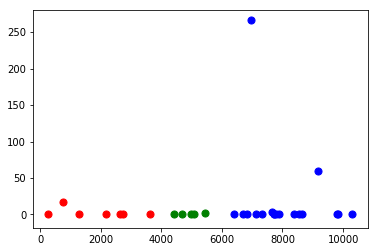

In [59]:
#Plotting agglomerative clusters in a scatter plot
plt.scatter(X[Agglolabels==0, 0], X[Agglolabels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[Agglolabels==1, 0], X[Agglolabels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[Agglolabels==2, 0], X[Agglolabels==2, 1], s=50, marker='o', color='green')
plt.show()

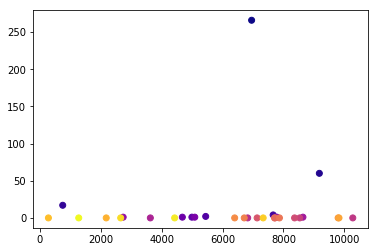

In [60]:
#Using Density-based spatial clustering(DBSCAN)
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dbscan = DBSCAN(eps=0.123, min_samples = 1)
clusters = dbscan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")

In [61]:
clusters

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])